In [12]:
import qspectra as qs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
monomer_ham = qs.VibronicHamiltonian(
    qs.ElectronicHamiltonian([[11500]], dipoles=[[1, 0, 0]], bath=None),
    n_vibrational_levels=[5], vib_energies=[200], elec_vib_couplings=[[-100]],
    energy_spread_extra=None)
monomer = qs.UnitaryModel(monomer_ham, hilbert_subspace='ge', unit_convert=qs.CM_FS)

## Excited state dynamics

In [14]:
n_states = monomer_ham.n_states('e')

In [15]:
%%time 
t, rho = qs.simulate_dynamics(monomer, qs.unit_vec(0, n_states), 1000)

CPU times: user 34.5 ms, sys: 4.94 ms, total: 39.4 ms
Wall time: 67.5 ms


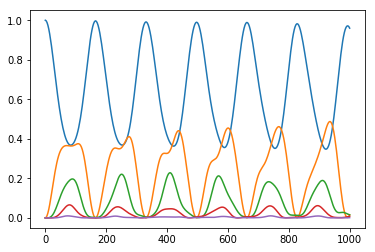

In [16]:
plt.plot(t, np.einsum('tii->ti', rho.reshape(-1, n_states, n_states)).real);

## Absorption spectra

In [17]:
%%time
f, X = qs.absorption_spectra(monomer, 10000, correlation_decay_time=1000)

CPU times: user 248 ms, sys: 9.84 ms, total: 258 ms
Wall time: 393 ms


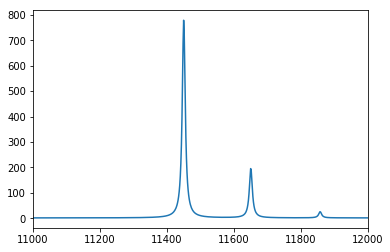

In [18]:
plt.plot(f, X)
plt.xlim(11000, 12000);